In [1]:
# basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# preprocessing imports
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# evaluation imports
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# modeling imports
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

# Data Prep

In [2]:
df = pd.read_csv(r"data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = df.drop(columns=["math_score"], axis=1)
y = df["math_score"]

In [5]:
numeric_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

In [6]:
nummeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("StandardScaler", nummeric_transformer, numeric_features),
        ("OneHotEncoder", oh_transformer, categorical_features),
    ]
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 7), (200, 7), (800,), (200,))

In [9]:
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_train_transformed.shape, X_test_transformed.shape

((800, 19), (200, 19))

# Modeling & Evaluation

In [12]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGB Regressor": xgb.XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "SVR": SVR(),
}

In [14]:
model_list = []
r2_list = []
rmse_list = []
mae_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train_transformed, y_train)  # train the model

    # make predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)

    # Evaluate
    model_train_mae, model_train_rmse, model_train_r2 = evaluate(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate(y_test, y_test_pred)

    model_list.append(list(models.keys())[i])
    print(list(models.keys())[i])

    print("Model performance on Training set")
    print("- RMSE: {:.4f}".format(model_train_rmse))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- MAE: {:.4f}".format(model_train_mae))

    print("-" * 30)

    print("Model performance on Test set")
    print("- RMSE: {:.4f}".format(model_test_rmse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- MAE: {:.4f}".format(model_test_mae))
    r2_list.append(model_test_r2)
    rmse_list.append(model_test_rmse)
    mae_list.append(model_test_mae)

    print("=" * 30)
    print("\n")

Linear Regression
Model performance on Training set
- RMSE: 5.3231
- R2 Score: 0.8743
- MAE: 4.2667
------------------------------
Model performance on Test set
- RMSE: 5.3940
- R2 Score: 0.8804
- MAE: 4.2148


Ridge
Model performance on Training set
- RMSE: 5.3233
- R2 Score: 0.8743
- MAE: 4.2650
------------------------------
Model performance on Test set
- RMSE: 5.3904
- R2 Score: 0.8806
- MAE: 4.2111


Lasso
Model performance on Training set
- RMSE: 6.5925
- R2 Score: 0.8072
- MAE: 5.2053
------------------------------
Model performance on Test set
- RMSE: 6.5173
- R2 Score: 0.8254
- MAE: 5.1557


KNeighbors Regressor
Model performance on Training set
- RMSE: 5.6991
- R2 Score: 0.8559
- MAE: 4.5083
------------------------------
Model performance on Test set
- RMSE: 7.2506
- R2 Score: 0.7840
- MAE: 5.5990


Decision Tree Regressor
Model performance on Training set
- RMSE: 0.2795
- R2 Score: 0.9997
- MAE: 0.0187
------------------------------
Model performance on Test set
- RMSE: 7.

# Model Selection

In [15]:
pd.DataFrame({"Model": model_list, "R2": r2_list, "RMSE": rmse_list, "MAE": mae_list})

,Model,R2,RMSE,MAE
0,Linear Regression,0.880433,5.393994,4.214763
1,Ridge,0.880592,5.390418,4.211113
2,Lasso,0.825447,6.517328,5.155701
3,KNeighbors Regressor,0.783958,7.250614,5.599000
4,Decision Tree Regressor,0.769149,7.494998,5.945000
5,Random Forest Regressor,0.857429,5.890079,4.566394
6,AdaBoost Regressor,0.846209,6.117446,4.759618
7,XGB Regressor,0.821220,6.595750,5.103629
8,CatBoost Regressor,0.851831,6.004608,4.608758
9,SVR,0.729105,8.119063,5.395143


In [16]:
lin_mod = LinearRegression(fit_intercept=True)
lin_mod.fit(X_train_transformed, y_train)
y_pred = lin_mod.predict(X_test_transformed)
print("training R2 score: ", r2_score(y_train, lin_mod.predict(X_train_transformed)))
print("test R2 score: ", r2_score(y_test, y_pred))

training R2 score:  0.8743172040139593
test R2 score:  0.8804332983749565


(-5.0, 105.0, -0.7368034151660652, 98.23381495256129)

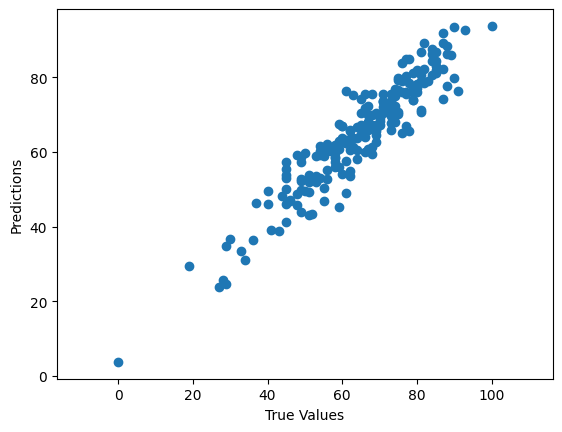

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.axis("equal")

(-5.0, 105.0, -0.8663893534457419, 100.95511965643449)

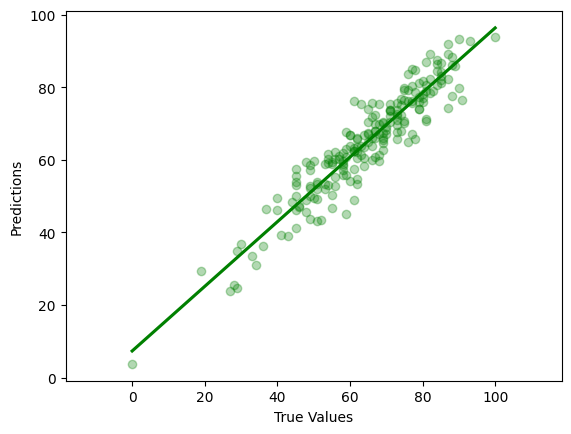

In [18]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="g", scatter_kws={"alpha": 0.3})
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.axis("equal")